In [105]:
import pandas as pd
df = pd.read_csv('C:/Users/saman/Documents/WF Project/notebooks/monthly_sentiment_final.csv')


In [106]:
df = df[['Product', 'Consumer complaint narrative', 'date_parsed', 'cleaned_text', 'sentiment_score',]]

In [107]:
df['date_parsed'] = pd.to_datetime(df['date_parsed'])

In [108]:
df['year_month'] = df['date_parsed'].dt.strftime('%Y-%m')

In [109]:
df = df.set_index(df['date_parsed'])
df = df.sort_index()
df.index = df.index.strftime('%Y-%m')

In [110]:
print(df.index)

Index(['2015-03', '2015-03', '2015-03', '2015-03', '2015-03', '2015-03',
       '2015-03', '2015-03', '2015-03', '2015-03',
       ...
       '2024-11', '2024-11', '2024-11', '2024-11', '2024-11', '2024-11',
       '2024-11', '2024-11', '2024-11', '2024-11'],
      dtype='object', name='date_parsed', length=19614)


In [111]:
df.drop(['date_parsed'], axis = 1, inplace=True)

In [112]:
df.head()

,Product,Consumer complaint narrative,cleaned_text,sentiment_score,year_month
date_parsed,,,,,
2015-03,Bank account or service,On XXXX XXXX around XXXX XXXX I called Wells F...,around called bank business personal account a...,0.089817,2015-03
2015-03,Bank account or service,My mother XXXX XXXX was a XXXX and has been a ...,mother victim identity theft bank fraud also v...,0.068636,2015-03
2015-03,Bank account or service,"On XXXX XXXX, 2014, I went into a Wells Fargo ...",went branch open new business checking account...,-0.026061,2015-03
2015-03,Bank account or service,Wells Fargo has recently began charging fees t...,recently began charging fee bank saving checki...,0.038961,2015-03
2015-03,Bank account or service,Wells Fargo failed to stop debits from XXXX af...,failed stop debit issuing stop payment order w...,-0.200000,2015-03


In [114]:
df.to_csv('cleaned_final_sent.csv')

C:\Users\saman\AppData\Local\Temp\ipykernel_660\683570463.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)


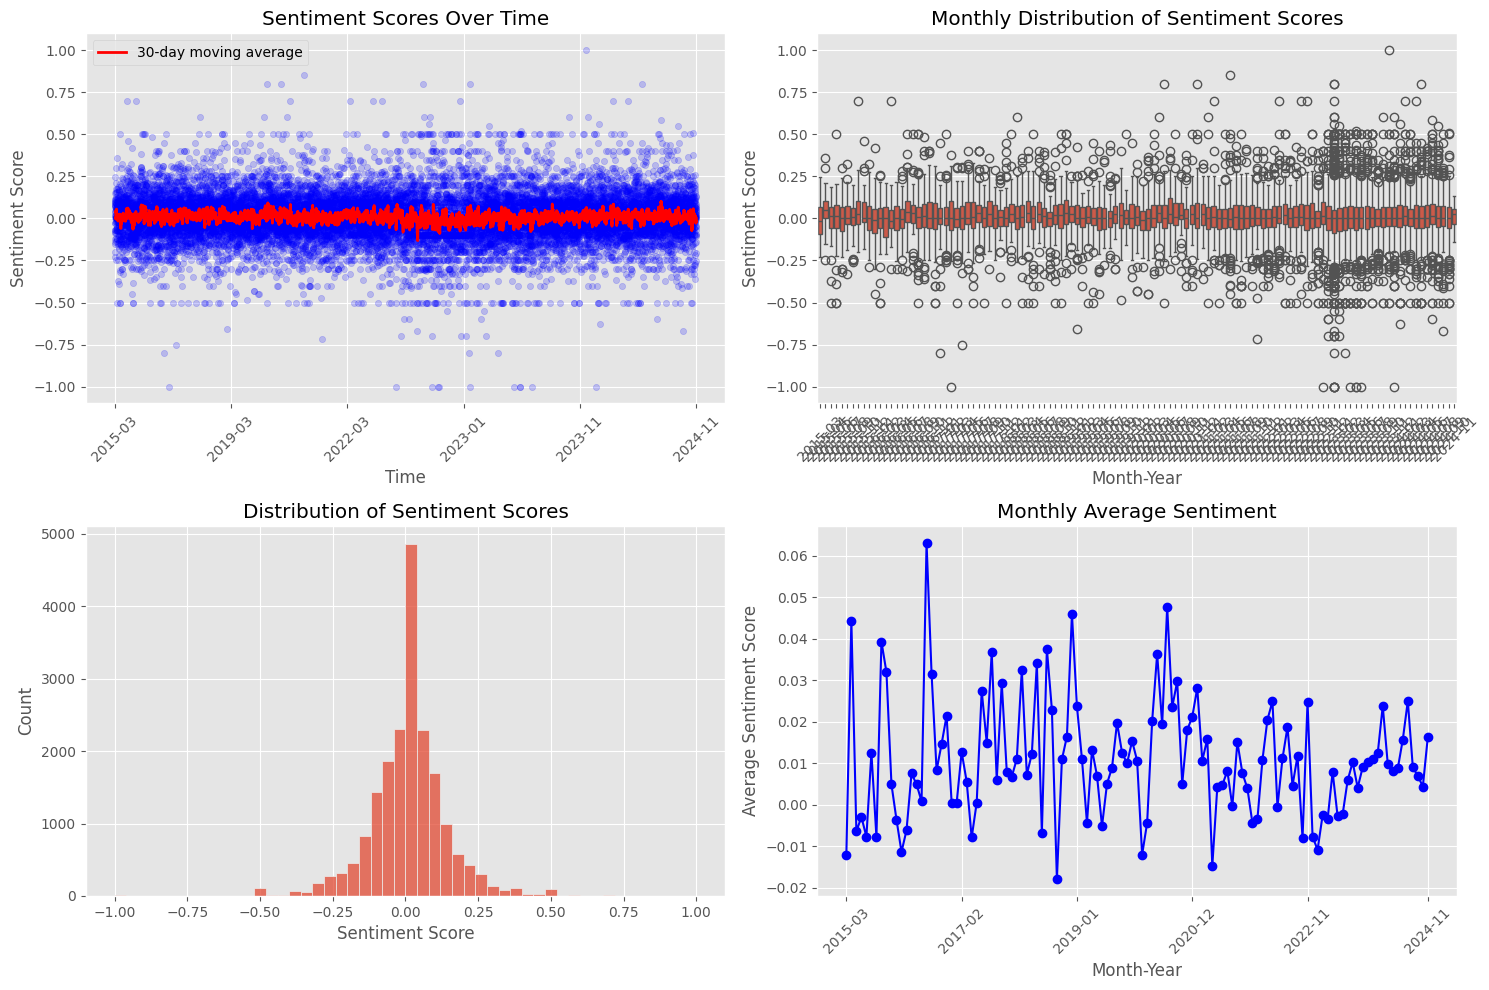

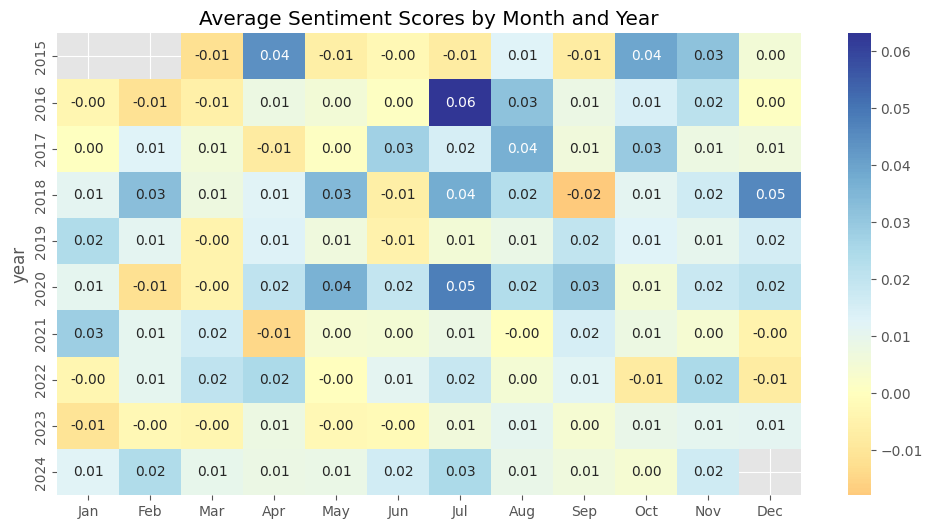

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Time series of sentiment scores
axes[0,0].scatter(range(len(df)), df['sentiment_score'], alpha=0.2, color='blue', s=20)
rolling_mean = df['sentiment_score'].rolling(window=30).mean()
axes[0,0].plot(range(len(df)), rolling_mean, color='red', linewidth=2, label='30-day moving average')
axes[0,0].set_title('Sentiment Scores Over Time')
axes[0,0].set_xlabel('Time')
axes[0,0].set_ylabel('Sentiment Score')
# Add some x-tick labels using index values
xticks = np.linspace(0, len(df)-1, 6, dtype=int)
axes[0,0].set_xticks(xticks)
axes[0,0].set_xticklabels([df.index[i] for i in xticks], rotation=45)
axes[0,0].legend()

# 2. Monthly box plot of sentiment scores
sns.boxplot(data=df, x=df.index, y='sentiment_score', ax=axes[0,1])
axes[0,1].set_title('Monthly Distribution of Sentiment Scores')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
axes[0,1].set_xlabel('Month-Year')
axes[0,1].set_ylabel('Sentiment Score')

# 3. Histogram of sentiment scores
sns.histplot(data=df, x='sentiment_score', bins=50, ax=axes[1,0])
axes[1,0].set_title('Distribution of Sentiment Scores')
axes[1,0].set_xlabel('Sentiment Score')
axes[1,0].set_ylabel('Count')

# 4. Monthly average sentiment
monthly_avg = df.groupby(df.index)['sentiment_score'].mean()
axes[1,1].plot(range(len(monthly_avg)), monthly_avg.values, color='blue', marker='o')
axes[1,1].set_title('Monthly Average Sentiment')
axes[1,1].set_xlabel('Month-Year')
axes[1,1].set_ylabel('Average Sentiment Score')
# Add x-tick labels
xticks = np.linspace(0, len(monthly_avg)-1, 6, dtype=int)
axes[1,1].set_xticks(xticks)
axes[1,1].set_xticklabels([monthly_avg.index[i] for i in xticks], rotation=45)

plt.tight_layout()
plt.show()

# Additional heatmap visualization
# First, create year and month columns from the index
df['year'] = df.index.str[:4].astype(int)
df['month'] = df.index.str[-2:].astype(int)

monthly_pivot = df.pivot_table(
    values='sentiment_score',
    index='year',
    columns='month',
    aggfunc='mean'
)
monthly_pivot.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Average Sentiment Scores by Month and Year')
plt.show()

In [ ]:
agg_df = df.copy(deep=True)

In [ ]:
monthly_trend = agg_df.groupby([
    agg_df.year_month
]).agg({
    'sentiment_score': ['mean', 'count']
}).round(4)

In [ ]:
monthly_trend.head()

sentiment_score      
                      mean count
year_month                      
2015-03            -0.0121    16
2015-04             0.0444    47
2015-05            -0.0064    58
2015-06            -0.0029    68
2015-07            -0.0077    69